<img src="./TS3_Logo_UTN.svg" align="right" width="150" /> 

##

***

## (950431) Teoría de Circuitos II

***

#### Profesor: Mariano Llamedo Soria  <llamedom@frba.utn.edu.ar>
#### Jefe de TPs: César Fuoco  <cfuoco@frba.utn.edu.ar>
#### Ayudante de TPs: Israel Pavelek <pavel@frba.utn.edu.ar>

####
***

# Trabajo Semanal # 3 con Chevyshev

#### Autor: *Moharos, David Santiago* <dmoharos@frba.utn.edu.ar>

####

***

In [7]:
from IPython.display import IFrame
IFrame("./TS3_con_Chevy.pdf", width= 1000, height= 4750)

#---------------------------------------------------------------------------------------------#
 
-- ε: Grado de libertad de la funcion --
 
ε = sqrt(10^(α_max/10)-1)
 
ε = 0.349
ε^2 = 0.122
 
#---------------------------------------------------------------------------------------------#
 
-- N: Orden del filtro --
 
α_min = 10*log(1 + ε^2*C_n^2) con C_n^2= cosh^2(N*cosh^(-1)(ω_s))
 
Para N= 1: ¿att = 6.239 dB >= α_min= 50?
Para N= 2: ¿att = 25.124 dB >= α_min= 50?
Para N= 3: ¿att = 45.243 dB >= α_min= 50?
Para N= 4: ¿att = 65.376 dB >= α_min= 50?
 
N= 4
 
#---------------------------------------------------------------------------------------------#
 
-- p_i: Polos en el semiplano izquierdo --
 
p_0= (-0.3132282431701372+1.0219274910473597j)
p_1= (-0.3132282431701372-1.0219274910473597j)
p_2= (-0.6264564863402742+0j)
 
#---------------------------------------------------------------------------------------------#
 
-- Función transferencia T(s): --
 


<IPython.core.display.Math object>

 
#---------------------------------------------------------------------------------------------#
 
-- Módulo, fase, diagrama de polos y ceros y retardo de fase --
 


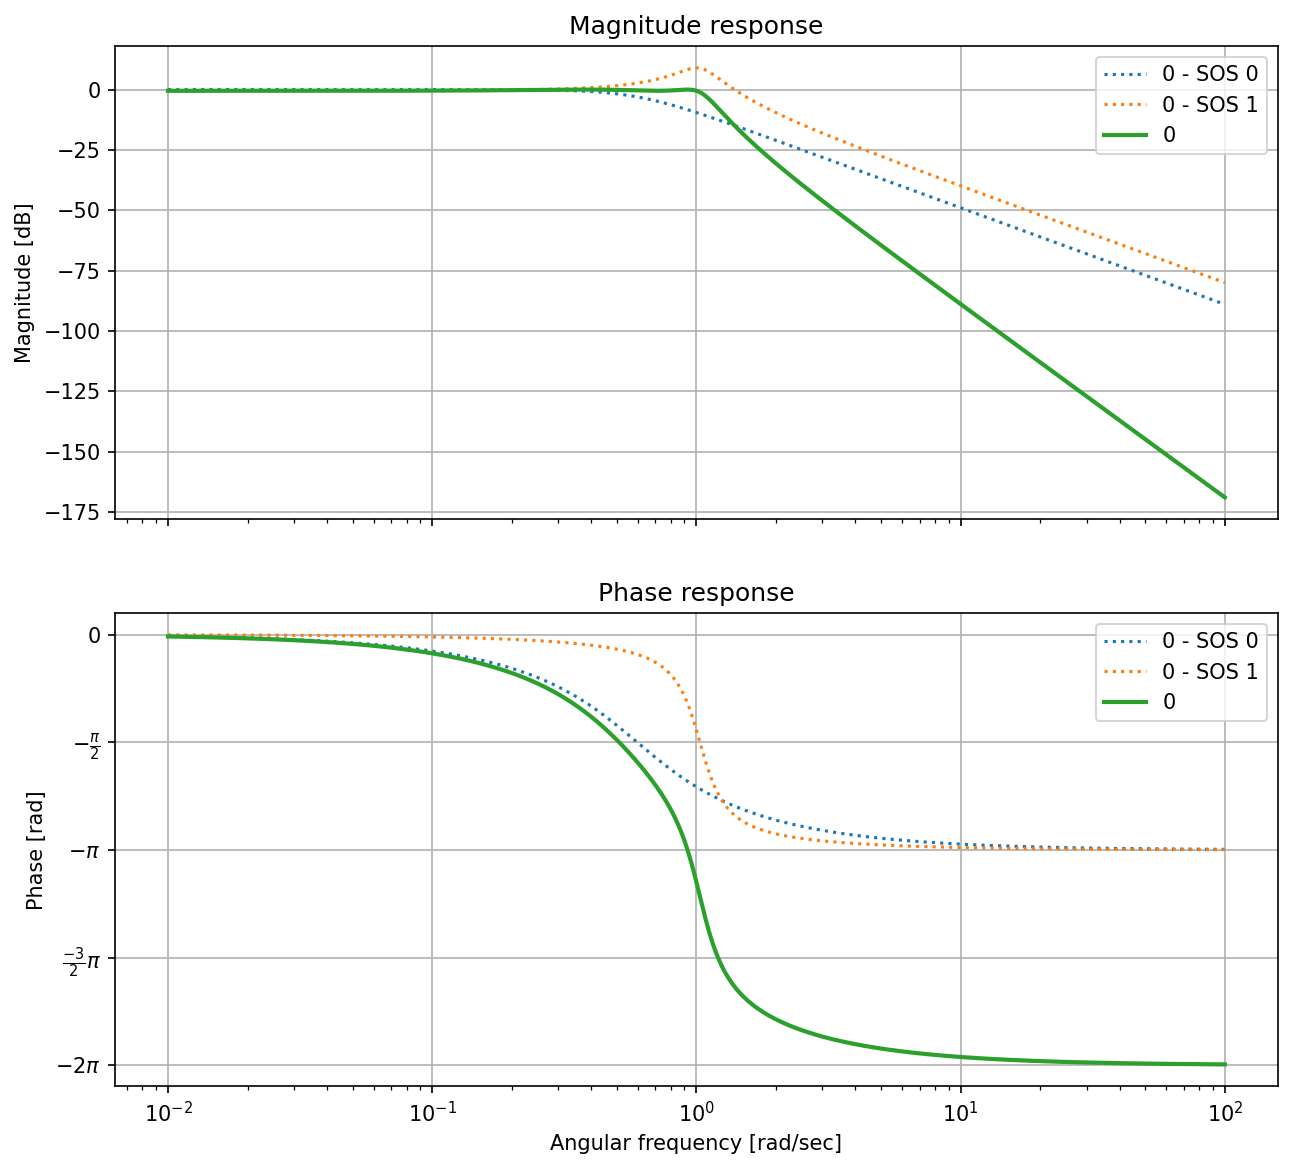

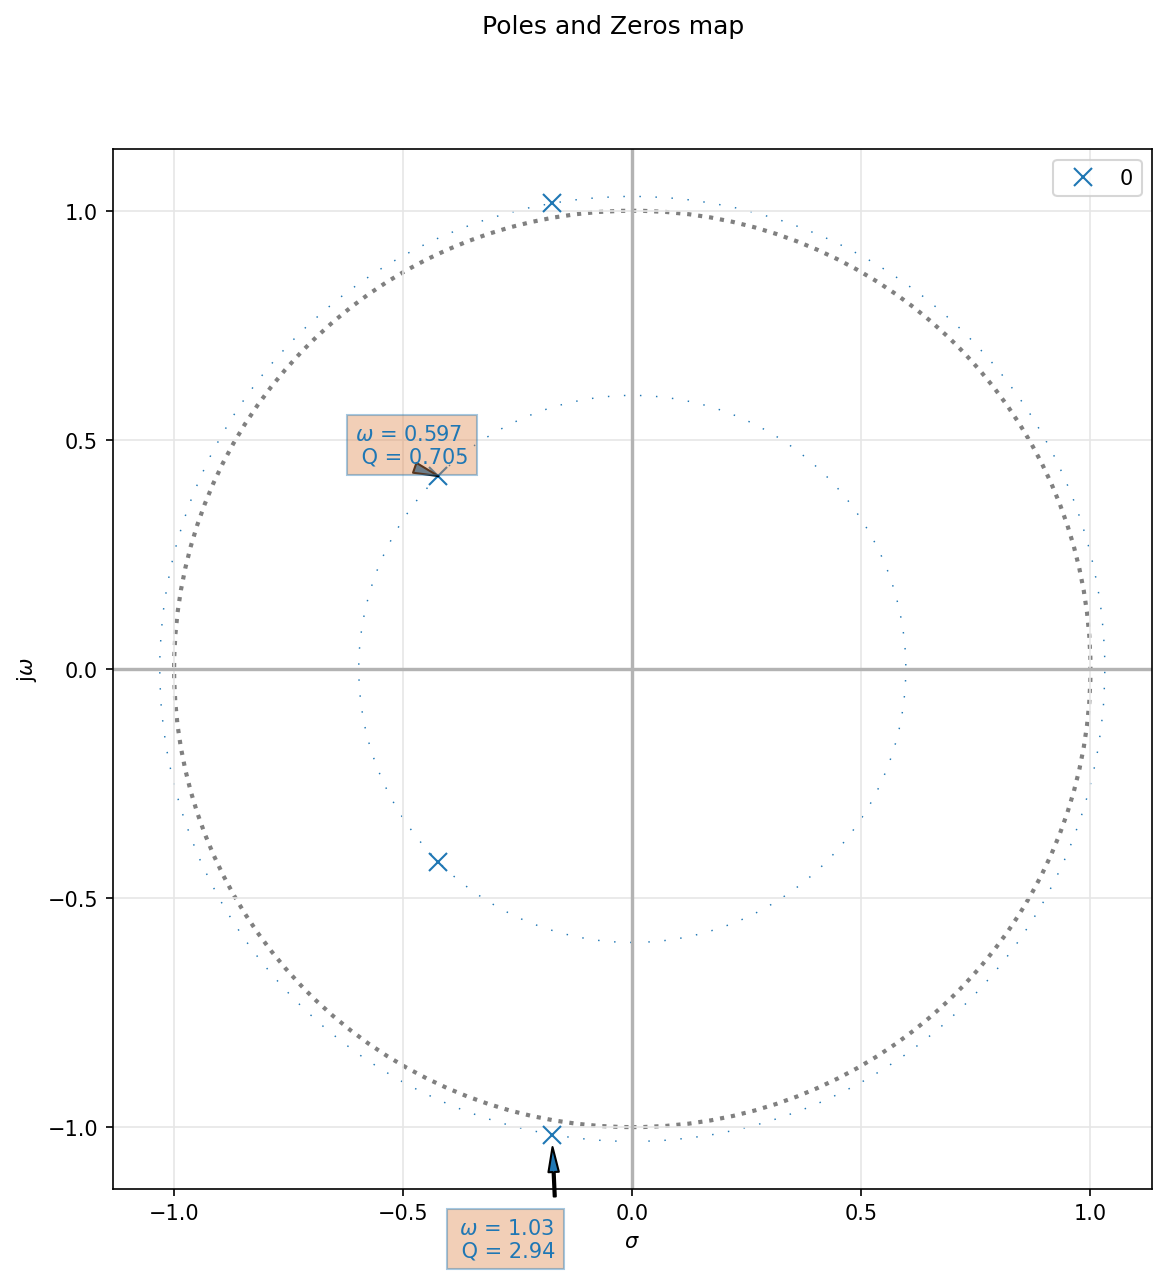

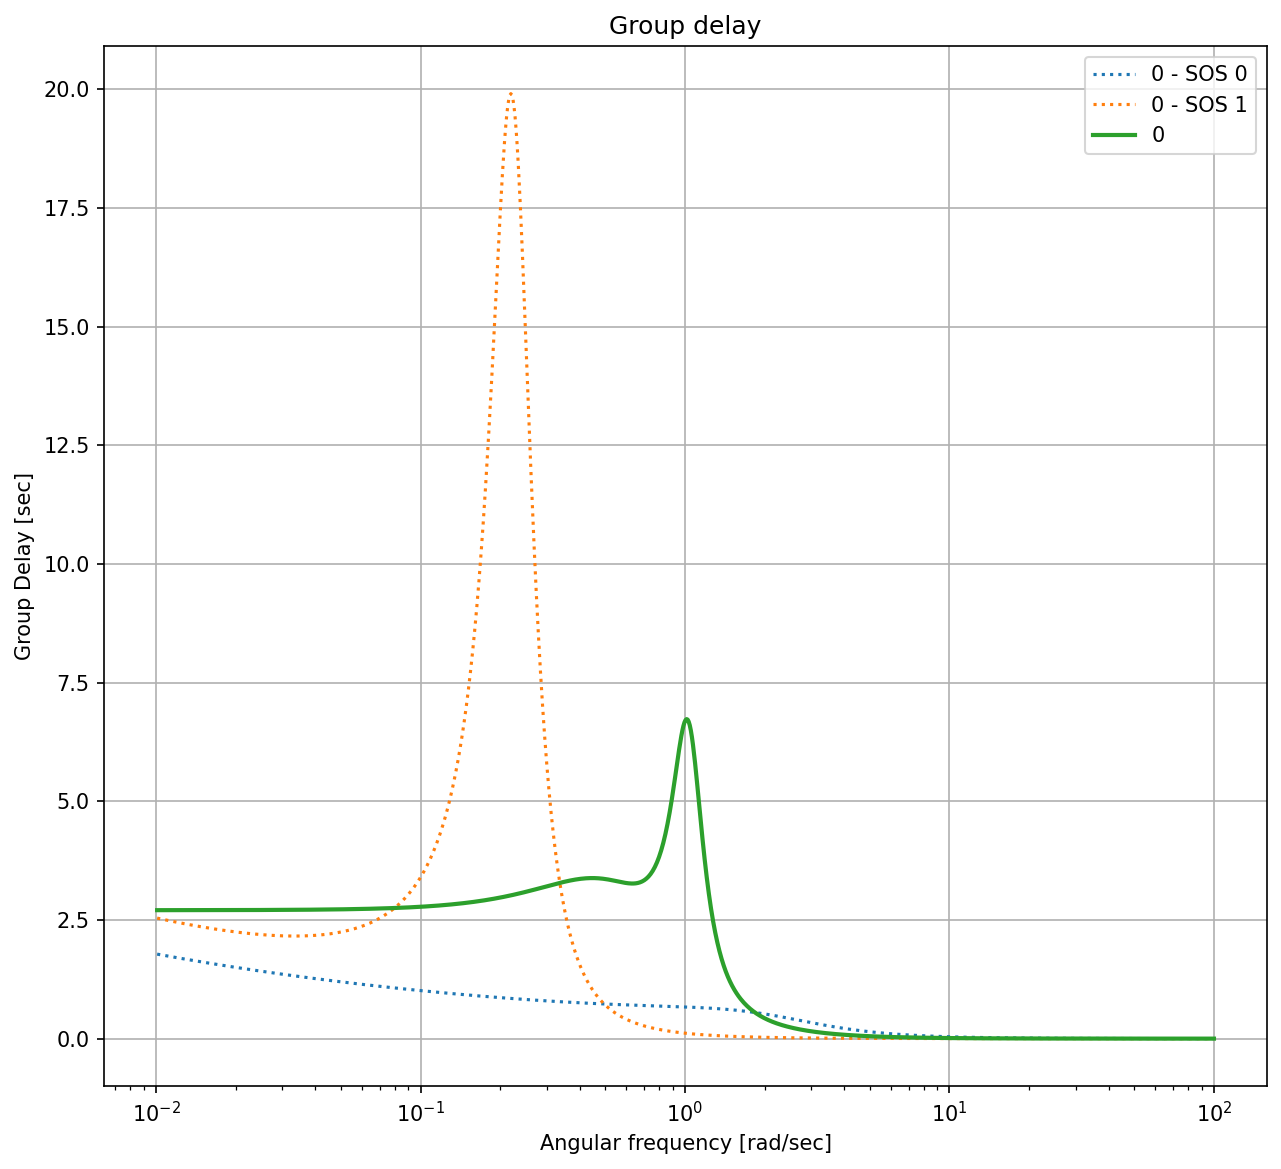

In [3]:
#-------------------------------------------------------------------------------------------------------------------#

# Inicializamos e importamos módulos

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy.signal as sig

fig_sz_x = 10
fig_sz_y = 9
fig_dpi = 150 # dpi

fig_font_size = 12

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
#plt.rcParams.update({'font.size':fig_font_size})

#-------------------------------------------------------------------------------------------------------------------#

# Importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys
from pytc2.sistemas_lineales import pretty_print_bicuad_omegayq
from pytc2.sistemas_lineales import tf2sos_analog
from pytc2.sistemas_lineales import pretty_print_SOS
from pytc2.general import print_subtitle

#-------------------------------------------------------------------------------------------------------------------#

# Calculamos e^2
alfa_max = 1    # dB
alfa_min = 12   # dB
omega_p = 1     # norm omega_p
omega_s = 2     # norm omega_s

eps = np.sqrt(10**(alfa_max/10)-1)

print('#---------------------------------------------------------------------------------------------#')
print(' ')
print('-- ε: Grado de libertad de la funcion --')
print(' ')

print('ε = sqrt(10^(α_max/10)-1)')

print(' ')

print('ε = {:3.3f}'.format(eps))
print('ε^2 = {:3.3f}'.format(eps**2))

print(' ')
print('#---------------------------------------------------------------------------------------------#')

#-------------------------------------------------------------------------------------------------------------------#

# Calculamos N
# Iteramos alfa_min
print(' ')
print('-- N: Orden del filtro --')
print(' ')

"""
-- Para máxima planicidad --

print('α_min = 10*log(1 + ε^2*ω_s^(2*N))')

for N in range(1,10):
    att = 10 * np.log10(1 + eps**2*omega_s**(2*N))
    print('Para N= {:d}: ¿att = {:3.3f} dB >= α_min= {:d}?'.format(N, att, alfa_min))
    if att >= alfa_min:
        break
"""

print('α_min = 10*log(1 + ε^2*C_n^2) con C_n^2= cosh^2(N*cosh^(-1)(ω_s))')
print(' ')

for N in range(1,10):
    C_nn = (np.cosh(N*(np.arccosh(omega_s))))**2
    att = 10*np.log10(1+(eps**2)*C_nn)    
    print('Para N= {:d}: ¿att = {:3.3f} dB >= α_min= {:d}?'.format(N, att, alfa_min))
    if att >= alfa_min:
        break

print(' ')

# N es el mismo que para máxima planicidad
#N= 3
print('N= {:d}'.format(N))

print(' ')
print('#---------------------------------------------------------------------------------------------#')

#-------------------------------------------------------------------------------------------------------------------#

# De la resolución analítica, obtenemos |T(jw)|^2:
# En función de eps^2:
num = [1]
den = [-16*eps**2, 0, -24*eps**2, 0, -9*eps**2, 0, 1]

# En función de los coeficientes a, b y c:
# a = 1/(16*eps**2)
# b = 3/2
# c = 9/16
# num = [a]
# den = [-1, 0, -b, 0, -c, 0, a]

# Imprimimos las raíces del denominador y verificamos que coinciden con la resolución analítica:
# Nota: np.roots(den) devuelve TODAS las raíces del denominador. 
# Para el análisis, nos quedamos con aquellas que se encuentran en el semiplano izquierdo


print(' ')
print('-- p_i: Polos en el semiplano izquierdo --')
print(' ')

den_aux= np.array(np.roots(den))
num_p= 0
for i in range(len(np.roots(den))):
    if den_aux[i].real < 0:
        print('p_{:d}= {}'.format(num_p, den_aux[i]))
        num_p+=1

print(' ')
print('#---------------------------------------------------------------------------------------------#')


# Obtenemos singularidades con la función de aproximación de Chevyshev: cheb1ap(N, rp)
"""
cheb1ap
Definition : cheb1ap(N, rp)

Return (z,p,k) for Nth-order Chebyshev type I analog lowpass filter.

The returned filter prototype has rp decibels of ripple in the passband.

The filter's angular (e.g. rad/s) cutoff frequency is normalized to 1, defined as the point at which the gain
first drops below -rp.

"""
z,p,k = sig.cheb1ap(N, alfa_max)

#-------------------------------------------------------------------------------------------------------------------#

# Transformamos las singularidades que nos devuelve cheb1ap(N, rp) para obtener el numerador y el denominador
# de la T(s) con zpk2tf(z,p,k)
"""
zpk2tf
Definition : zpk2tf(z, p, k)

Return polynomial transfer function representation from zeros and poles

Parameters
zarray_like
Zeros of the transfer function.

parray_like
Poles of the transfer function.

kfloat
System gain.

Returns
bndarray
Numerator polynomial coefficients.

andarray
Denominator polynomial coefficients.
"""
num, den = sig.zpk2tf(z,p,k)

#-------------------------------------------------------------------------------------------------------------------#

# Transformamos (factorizamos) la T(s) en secciones de segundo orden (SOS) con la función tf2sos_analog()
"""
def tf2sos_analog(num, den, pairing='nearest'):
    Parameters
    ----------
    tfa : TYPE
        DESCRIPTION.
    tfb : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    Example
    -------

    z, p, k = tf2zpk(num, den)
    
    sos = zpk2sos_analog(z, p, k, pairing = pairing)

    return sos
"""
this_sos = tf2sos_analog(num, den)

#-------------------------------------------------------------------------------------------------------------------#

# Imprimimos la T(s) en formato T(s)= num/den con la funcion pretty_print_SOS():

"""
Los SOS siempre deben definirse como:

mySOS= ( [ a1_1 a2_1 a3_1 b1_1 b2_1 b3_1 ] [ a1_2 a2_2 a3_2 b1_2 b2_2 b3_2 ] ... [ a1_N a2_N a3_N b1_N b2_N b3_N ])

siendo:
      s^2 a1_i + s a2_i + a3_i
T_i = -------------------------
      s^2 b1_i + s b2_i + b3_i

Parameters
mySOSTYPE
DESCRIPTION.

modeTYPE, optional
DESCRIPTION. The default is 'default'.

Raises
ValueError
DESCRIPTION.

Returns
None.
"""
print(' ')
print('-- Función transferencia T(s): --')
print(' ')

pretty_print_SOS(this_sos)

print(' ')
print('#---------------------------------------------------------------------------------------------#')
print(' ')

#-------------------------------------------------------------------------------------------------------------------#
# Representamos módulo, fase, diagrama de polos y ceros y retardo de fase con la analyze_sys() que tiene, entre
# otras cosas, indicadores (w0 y Q) de las singularidades en el diagrama de polos y ceros
"""
analyze_sys
Definition : analyze_sys(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, digital=False, fs=2*np.pi)

Analyzes the behavior of a linear system in terms of:

Magnitude and phase response or Bode plot

Pole-zero map

Group delay

The funcion admits the system to analyze (all_sys) as:

one or a list of TransferFunction objects

a matrix defining several second order sections (SOSs).

If all_sys is a SOS matrix, the function displays each of the SOS, and the system resulting frome the cascade of all SOS.

Parameters
all_syslist or (Nx5) matrix
The linear system to analyze. Wether a list of [scipy.signal.TransferFuncion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) objects or a matrix defining a cascade of SOS.

sys_namestring or list.
The labels or system description. Default: None

img_extstring ['none', 'png', 'svg'].
When different from 'none' the function save plot results to a file with the indicated extension. Default: 'none'

same_figsboolean
Use always the same figure numbers to plot results. When False, each call produce a new group of figures in a separate plot container. Default: True

annotationsboolean
Add annotations to the PZmap plot. When True, each singularity will be acompanied of the value of omega (i.e. the radial distance to the origin) and Q (i.e. measure of proximity to the jw axis). Default: True

digitalboolean
True to analyze the system as digital. Default: False

fsreal value.
The sampling frequency of the digital system. Valid only if digital is True. Default: 2*np.pi

Returns
None.

Example
Analyze a system with w0 = 1 rad/s and Q = sqrt(2)/2

>>> import numpy as np
>>> from scipy import signal as sig
>>> from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq
>>> Q = np.sqrt(2)/2
>>> w0 = 1
>>> # Cargamos la funcion transferencia como vectores de sus coeficientes.
>>> num = np.array([ w0**2 ])
>>> den = np.array([ 1., w0 / Q, w0**2 ])
>>> H1 = sig.TransferFunction( num, den )
>>> pretty_print_bicuad_omegayq(num,den)
>>> analyze_sys(H1, sys_name='mi ejemplo')
Compare the former system with two others with different Q values

>>> Q = 5
>>> w0 = 1
>>> num = np.array([ w0**2 ])
>>> den = np.array([ 1., w0 / Q, w0**2 ])
>>> H2 = sig.TransferFunction( num, den )
>>> analyze_sys([H1, H2], sys_name=['H1', 'H2'])
See Also
pretty_print_bicuad_omegayq() bodePlot() pzmap()
"""

print('-- Módulo, fase, diagrama de polos y ceros y retardo de fase --')
print(' ')

analyze_sys(this_sos)

#-------------------------------------------------------------------------------------------------------------------#